In [1]:
import pandas as pd
import matplotlib.pyplot as plt
print("All packages imported successfully!")
 
print(f"Pandas version: {pd.__version__}")
# Test loading the data file
df = pd.read_csv('UNRATE.csv')
print(f"Data loaded successfully! Shape: {df.shape}")

Matplotlib is building the font cache; this may take a moment.


All packages imported successfully!
Pandas version: 2.3.0
Data loaded successfully! Shape: (928, 2)


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
# Load the provided unemployment data
df = pd.read_csv('UNRATE.csv')
df['DATE'] = pd.to_datetime(df['observation_date'])
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
df.head()

Dataset shape: (928, 3)

First 5 rows:


,observation_date,UNRATE,DATE
0,1948-01-01,3.4,1948-01-01
1,1948-02-01,3.8,1948-02-01
2,1948-03-01,4.0,1948-03-01
3,1948-04-01,3.9,1948-04-01
4,1948-05-01,3.5,1948-05-01


In [9]:
df.tail

<bound method NDFrame.tail of     observation_date  UNRATE       DATE
0         1948-01-01     3.4 1948-01-01
1         1948-02-01     3.8 1948-02-01
2         1948-03-01     4.0 1948-03-01
3         1948-04-01     3.9 1948-04-01
4         1948-05-01     3.5 1948-05-01
..               ...     ...        ...
923       2024-12-01     4.1 2024-12-01
924       2025-01-01     4.0 2025-01-01
925       2025-02-01     4.1 2025-02-01
926       2025-03-01     4.2 2025-03-01
927       2025-04-01     4.2 2025-04-01

[928 rows x 3 columns]>

In [4]:
print("Data types:")
print(df.dtypes)
print("\nBasic statistics:")
df['UNRATE'].describe()

Data types:
observation_date            object
UNRATE                     float64
DATE                datetime64[ns]
dtype: object

Basic statistics:


count    928.000000
mean       5.676724
std        1.708352
min        2.500000
25%        4.300000
50%        5.500000
75%        6.700000
max       14.800000
Name: UNRATE, dtype: float64

In [6]:

import pandas as pd
import matplotlib.pyplot as plt
# Load the provided unemployment data
df = pd.read_csv('UNRATE.csv')
# Convert DATE column to datetime
df['DATE'] = pd.to_datetime(df['observation_date'])
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nData types:")
print(df.dtypes)

Dataset shape: (928, 3)

First 5 rows:
  observation_date  UNRATE       DATE
0       1948-01-01     3.4 1948-01-01
1       1948-02-01     3.8 1948-02-01
2       1948-03-01     4.0 1948-03-01
3       1948-04-01     3.9 1948-04-01
4       1948-05-01     3.5 1948-05-01

Data types:
observation_date            object
UNRATE                     float64
DATE                datetime64[ns]
dtype: object


In [7]:
average_unrate = df["UNRATE"].mean()
print("Average UNRATE:", average_unrate)


Average UNRATE: 5.676724137931035


In [8]:
# Highest UNRATE
max_row = df.loc[df["UNRATE"].idxmax()]
print("Highest UNRATE:")
print("  UNRATE:", max_row["UNRATE"])
print("  DATE:  ", max_row["DATE"])

# Lowest UNRATE
min_row = df.loc[df["UNRATE"].idxmin()]
print("\nLowest UNRATE:")
print("  UNRATE:", min_row["UNRATE"])
print("  DATE:  ", min_row["DATE"])


Highest UNRATE:
  UNRATE: 14.8
  DATE:   2020-04-01 00:00:00

Lowest UNRATE:
  UNRATE: 2.5
  DATE:   1953-05-01 00:00:00


In [10]:
import pandas as pd

# Ensure DATE column is datetime
df["DATE"] = pd.to_datetime(df["DATE"])

# Create a 'Decade' column
df["Decade"] = (df["DATE"].dt.year // 10) * 10

# Group by decade and calculate summary statistics
decade_stats = df.groupby("Decade")["UNRATE"].agg(["mean", "min", "max", "std", "count"]).reset_index()

# Rename columns for clarity (optional)
decade_stats.columns = ["Decade", "Average UNRATE", "Min UNRATE", "Max UNRATE", "Std Dev", "Count"]

# Display results
print(decade_stats)


   Decade  Average UNRATE  Min UNRATE  Max UNRATE   Std Dev  Count
0    1940        4.900000         3.4         7.9  1.380926     24
1    1950        4.511667         2.5         7.5  1.285614    120
2    1960        4.779167         3.4         7.1  1.072176    120
3    1970        6.217500         3.9         9.0  1.163425    120
4    1980        7.272500         5.0        10.8  1.481083    120
5    1990        5.762500         4.0         7.8  1.049294    120
6    2000        5.541667         3.8        10.0  1.447199    120
7    2010        6.220833         3.5         9.9  2.061365    120
8    2020        4.901562         3.4        14.8  2.282751     64


In [11]:
import pandas as pd

# Ensure DATE column is in datetime format
df["DATE"] = pd.to_datetime(df["DATE"])

# Extract the year
df["Year"] = df["DATE"].dt.year

# Group by year and calculate average UNRATE
yearly_avg = df.groupby("Year")["UNRATE"].mean()

# Find the year with the highest average unemployment rate
max_year = yearly_avg.idxmax()
max_value = yearly_avg.max()

print(f"Year with highest average unemployment rate: {max_year}")
print(f"Average UNRATE: {max_value:.2f}")


Year with highest average unemployment rate: 1982
Average UNRATE: 9.71


In [12]:
# Ensure DATE column is datetime
df["DATE"] = pd.to_datetime(df["DATE"])

# ---- 2008 Financial Crisis (2008–2010) ----
crisis_2008 = df[(df["DATE"] >= "2008-01-01") & (df["DATE"] <= "2010-12-31")]

# Peak UNRATE during crisis
max_2008 = crisis_2008.loc[crisis_2008["UNRATE"].idxmax()]
avg_2008 = crisis_2008["UNRATE"].mean()

print("2008 Financial Crisis:")
print(f"  Peak UNRATE: {max_2008['UNRATE']}% in {max_2008['DATE'].strftime('%B %Y')}")
print(f"  Average UNRATE: {avg_2008:.2f}%\n")

# ---- COVID-19 Pandemic (2020 onward) ----
covid = df[df["DATE"] >= "2020-01-01"]

# Peak UNRATE during COVID
max_covid = covid.loc[covid["UNRATE"].idxmax()]
avg_covid = covid["UNRATE"].mean()

print("COVID-19 Pandemic:")
print(f"  Peak UNRATE: {max_covid['UNRATE']}% in {max_covid['DATE'].strftime('%B %Y')}")
print(f"  Average UNRATE: {avg_covid:.2f}%")


2008 Financial Crisis:
  Peak UNRATE: 10.0% in October 2009
  Average UNRATE: 8.23%

COVID-19 Pandemic:
  Peak UNRATE: 14.8% in April 2020
  Average UNRATE: 4.90%


In [13]:
# Get the row with the lowest standard deviation
lowest_std_row = decade_stats.loc[decade_stats["Std Dev"].idxmin()]

# Print the result
print("Decade with the lowest unemployment rate standard deviation:")
print(lowest_std_row)


Decade with the lowest unemployment rate standard deviation:
Decade            1990.000000
Average UNRATE       5.762500
Min UNRATE           4.000000
Max UNRATE           7.800000
Std Dev              1.049294
Count              120.000000
Name: 5, dtype: float64


Average Unemployment Rate (2015–2025):
    Year    UNRATE
0   2015  5.275000
1   2016  4.875000
2   2017  4.358333
3   2018  3.891667
4   2019  3.675000
5   2020  8.100000
6   2021  5.358333
7   2022  3.641667
8   2023  3.633333
9   2024  4.033333
10  2025  4.125000


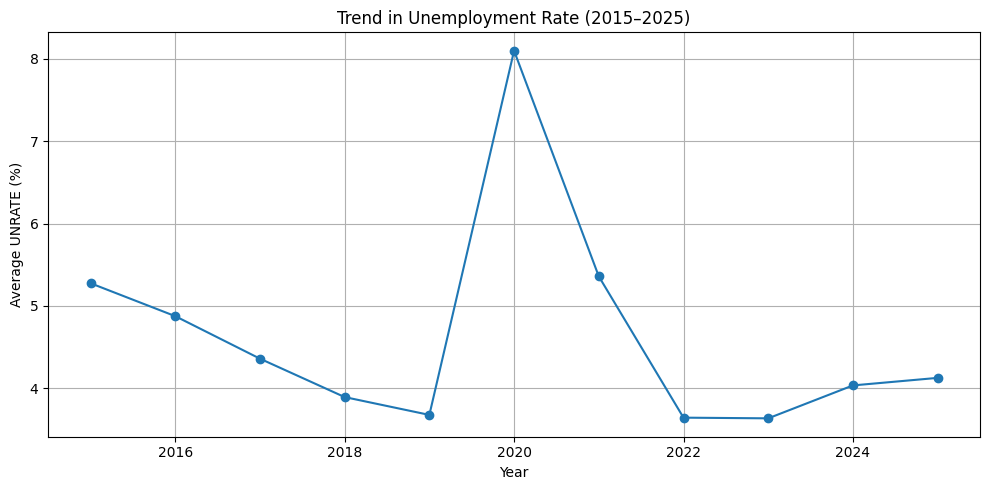

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure DATE is in datetime format
df["DATE"] = pd.to_datetime(df["DATE"])

# Extract year
df["Year"] = df["DATE"].dt.year

# Filter for the last 10 years (2015–2025)
last_10_years = df[df["Year"] >= 2015]

# Compute yearly average unemployment rate
yearly_avg = last_10_years.groupby("Year")["UNRATE"].mean().reset_index()

# Print values
print("Average Unemployment Rate (2015–2025):")
print(yearly_avg)

# Plot trend
plt.figure(figsize=(10, 5))
plt.plot(yearly_avg["Year"], yearly_avg["UNRATE"], marker='o', linestyle='-')
plt.title("Trend in Unemployment Rate (2015–2025)")
plt.xlabel("Year")
plt.ylabel("Average UNRATE (%)")
plt.grid(True)
plt.tight_layout()
plt.show()


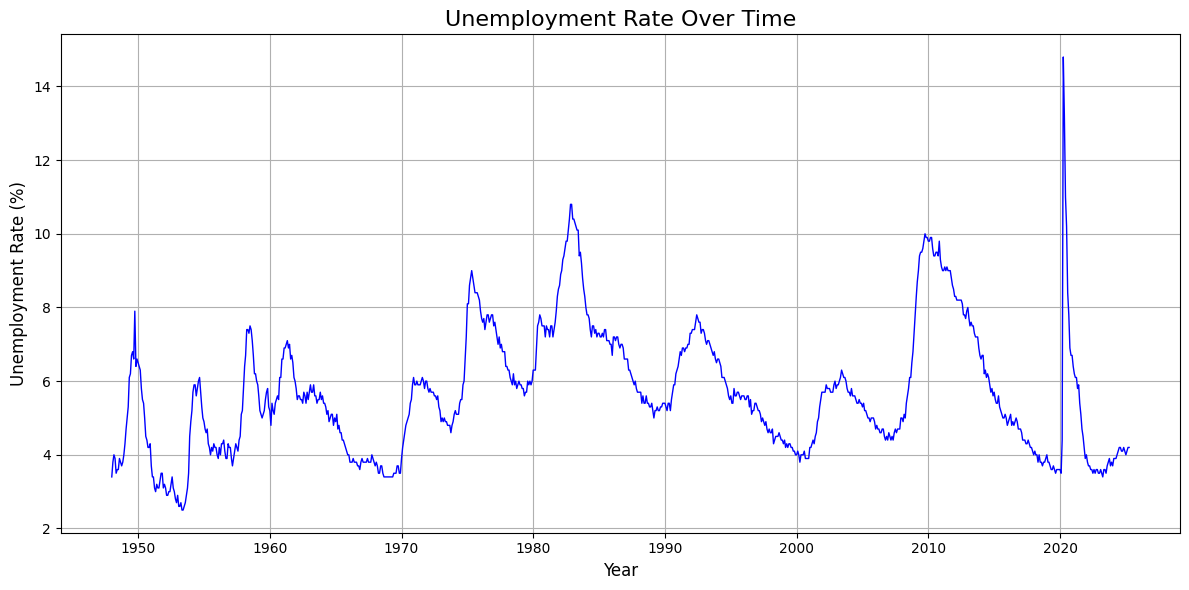

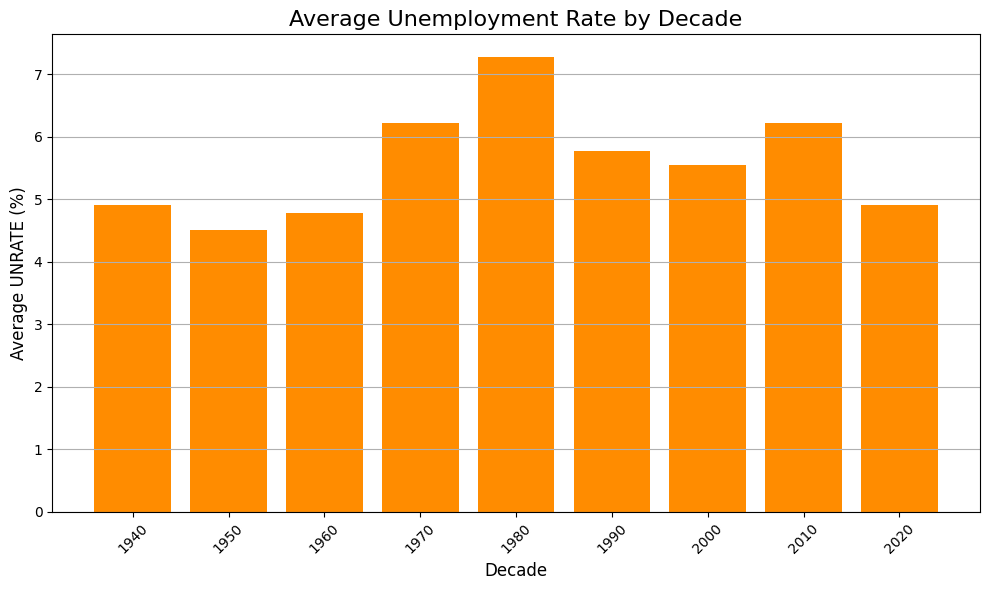

In [16]:

import pandas as pd
import matplotlib.pyplot as plt

# Ensure DATE is datetime
df["DATE"] = pd.to_datetime(df["DATE"])

# ------------------------------
# Line Chart: Unemployment Rate Over Time
# ------------------------------
plt.figure(figsize=(12, 6))
plt.plot(df["DATE"], df["UNRATE"], color="blue", linewidth=1)
plt.title("Unemployment Rate Over Time", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Unemployment Rate (%)", fontsize=12)
plt.grid(True)
plt.tight_layout()

# Save and Show
plt.savefig("unemployment_trend.png", dpi=300)
plt.show()

# ------------------------------
# Bar Chart: Average Unemployment by Decade
# ------------------------------
# Create 'Decade' column
df["Decade"] = (df["DATE"].dt.year // 10) * 10

# Group and compute averages
decade_avg = df.groupby("Decade")["UNRATE"].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(decade_avg["Decade"].astype(str), decade_avg["UNRATE"], color="darkorange")
plt.title("Average Unemployment Rate by Decade", fontsize=16)
plt.xlabel("Decade", fontsize=12)
plt.ylabel("Average UNRATE (%)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()

# Save and Show
plt.savefig("unemployment_by_decade.png", dpi=300)
plt.show()

